In [147]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, FunctionTransformer, RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from models.prepareData import getData, convertData, calcMinimumMaximum
from models.models import linearRegressionModel, PolynomialFeatures, polynomialRegression

In [148]:
# data = getData('Bán căn hộ chung cư', 'Nguyễn Hữu Thọ', 'Phước Kiển', 'Nhà Bè')
# data = getData('Bán căn hộ chung cư', 'Nguyễn Hữu Cảnh', '22', 'Bình Thạnh')
# data = getData('Bán đất', 'Trần Văn Giàu', 'Lê Minh Xuân', 'Bình Chánh')
# data = getData('Bán đất', 'Vườn Lài', 'An Phú Đông', '12')
# data = getData('Bán nhà riêng', 'Quốc Lộ 13', 'Hiệp Bình Phước', 'Thủ Đức')
# data = getData('Bán nhà riêng', 'Phạm Văn Chiêu', '9', 'Gò Vấp')
# data = getData('Bán nhà riêng', 'Nguyễn Văn Quá', 'Đông Hưng Thuận', '12')
# data = getData('Bán nhà riêng', 'Quốc Lộ 13', 'Hiệp Bình Phước', 'Thủ Đức')
# data = getData('Bán đất', 'Nguyễn Thị Rành', 'Nhuận Đức', 'Củ Chi')
data = getData('Bán nhà riêng', 'Số 8', 'Linh Xuân', 'Thủ Đức')
# data = getData('Bán nhà riêng', '3/2', '14', '10')

In [149]:
post_type = data['post_type'].iloc[0]
street = data['street'].iloc[0]
ward = data['ward'].iloc[0]
district = data['district'].iloc[0]

In [150]:
print("Data length: ", len(data))

Data length:  102


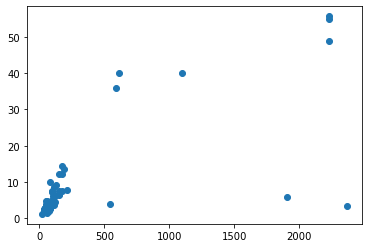

In [151]:
plt.scatter(data['area'], data['price'])
plt.show()

In [152]:
# preprocess data:

# sort data in post_date order to drop old data has same area:
# data = data.sort_values(by=['posted_date'])

# Drop duplicates:    
# data = data.drop_duplicates(subset='area', keep='last', inplace=False)

# Instead of drop duplicates try calc and use its mean value:
data = data.groupby(['area'], as_index=False).mean()

# sort data in area order:
data = data.sort_values(by=['area'])

In [153]:
data

,area,price
0,21.0,1.199100
1,33.3,2.450000
2,36.0,2.150000
3,38.0,2.200000
4,40.0,2.516667
...,...,...
70,1100.0,40.000000
71,1910.0,6.000000
72,2228.0,55.350000
73,2228.4,49.000000


In [154]:
data = data[~(data['area'] < 10)]
data = data[~(data['price'] > 200)]

In [155]:
print("Data length: ", len(data))

Data length:  75


In [156]:
# transform data into log1p
data['area'] = (data['area']).transform(np.log1p)
data['price'] = (data['price']).transform(np.log1p)

In [157]:
area_mean = np.mean(data['area'])
area_std = np.std(data['area'])

price_mean = np.mean(data['price'])
price_std = np.std(data['price'])

data = data[~( (data['area'] < area_mean) & (data['price'] > price_mean) )]
data = data[~( (data['area'] > area_mean) & (data['price'] < price_mean - price_std) )]

In [158]:
# # remove outliers using box-plot:
# while True:
#     area_minimum, area_maximum = calcMinimumMaximum(data['area'])
#     if (data['area'] > area_minimum).all() and (data['area'] < area_maximum).all():
#         break
#     else:
#         data = data[(data['area'] > area_minimum) & (data['area'] < area_maximum)]

# while True:
#     price_minimum, price_maximum = calcMinimumMaximum(data['price'])
#     if (data['price'] > price_minimum).all() and (data['price'] < price_maximum).all():
#         break
#     else:
#         data = data[(data['price'] > price_minimum) & (data['price'] < price_maximum)]

In [159]:
# area_minimum, area_maximum = calcMinimumMaximum(data['area'])
# data = data[(data['area'] > area_minimum) & (data['area'] < area_maximum)]

# price_minimum, price_maximum = calcMinimumMaximum(data['price'])
# data = data[(data['price'] > price_minimum) & (data['price'] < price_maximum)]

In [160]:
# data = data[(data['area'] > 5.5)]

In [161]:
print("Data length: ", len(data))

Data length:  72


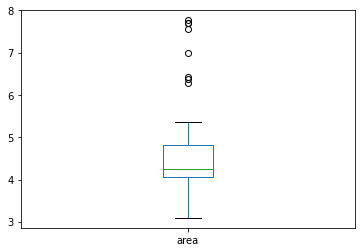

In [162]:
data['area'].plot(kind='box')
plt.show()

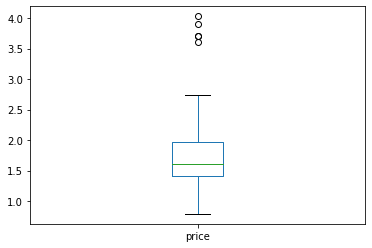

In [163]:
data['price'].plot(kind='box')
plt.show()

In [164]:
print("Data length: ", len(data))

Data length:  72


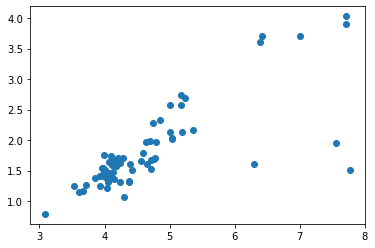

In [165]:
plt.scatter(data['area'], data['price'])
plt.show()

In [166]:
data.iloc[:round(len(data)/2)]
# data_2 = data.iloc[round(len(data)/2):]

,area,price
0,3.091042,0.788048
1,3.535145,1.238374
2,3.610918,1.147402
3,3.663562,1.163151
4,3.713572,1.257514
5,3.845883,1.373594
6,3.923952,1.410987
7,3.925926,1.252737
8,3.931826,1.410987
9,3.960813,1.547073



Outliers detected by Local Outlier Factor with n_neighbors =  10


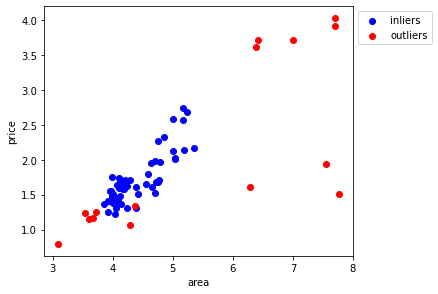

In [167]:
from models.models import localOutlierFactor
data = localOutlierFactor(data, 10)

In [168]:
# divide data into train and test:
train_data, test_data = train_test_split(data, test_size=0.3)
test_data, validate_data = train_test_split(test_data, test_size=0.5)

In [169]:
# Sort data by area column:
train_data = train_data.sort_values(by=['area'])
test_data = test_data.sort_values(by=['area'])
validate_data = validate_data.sort_values(by=['area'])

print("\nTrain data length: ", len(train_data))
print("Test data length: ", len(test_data))
print("Validate data length: ", len(validate_data))


Train data length:  39
Test data length:  9
Validate data length:  9


In [170]:
# # convert data into numpy
X, Y = convertData(data)
X_train, Y_train = convertData(train_data)
X_test, Y_test = convertData(test_data)
X_validate, Y_validate = convertData(validate_data)

In [171]:
# scale data:

# Standard Scaler:

# X = StandardScaler().fit_transform(X)
# Y = StandardScaler().fit_transform(Y)

# X_train = StandardScaler().fit_transform(X_train)
# Y_train = StandardScaler().fit_transform(Y_train)

# X_test = StandardScaler().fit_transform(X_test)
# Y_test = StandardScaler().fit_transform(Y_test)

# X_validate = StandardScaler().fit_transform(X_validate)
# Y_validate = StandardScaler().fit_transform(Y_validate)


# Quantile Transformer:

# X = QuantileTransformer(n_quantiles=len(X_train), output_distribution='uniform').fit_transform(X)
# Y = QuantileTransformer(n_quantiles=len(Y_train), output_distribution='uniform').fit_transform(Y)

# X_train = QuantileTransformer(n_quantiles=len(X_train), output_distribution='uniform').fit_transform(X_train)
# Y_train = QuantileTransformer(n_quantiles=len(Y_train), output_distribution='uniform').fit_transform(Y_train)

# X_test = QuantileTransformer(n_quantiles=len(X_test), output_distribution='uniform').fit_transform(X_test)
# Y_test = QuantileTransformer(n_quantiles=len(X_test), output_distribution='uniform').fit_transform(Y_test)

# X_validate = QuantileTransformer(n_quantiles=len(X_validate), output_distribution='uniform').fit_transform(X_validate)
# Y_validate = QuantileTransformer(n_quantiles=len(Y_validate), output_distribution='uniform').fit_transform(Y_validate)

# Power Transformer:

# X = PowerTransformer(method='yeo-johnson').fit_transform(X)
# Y = PowerTransformer(method='yeo-johnson').fit_transform(Y)

# X_train = PowerTransformer(method='yeo-johnson').fit_transform(X_train)
# Y_train = PowerTransformer(method='yeo-johnson').fit_transform(Y_train)

# X_test = PowerTransformer(method='yeo-johnson').fit_transform(X_test)
# Y_test = PowerTransformer(method='yeo-johnson').fit_transform(Y_test)

# X_validate = PowerTransformer(method='yeo-johnson').fit_transform(X_validate)
# Y_validate = PowerTransformer(method='yeo-johnson').fit_transform(Y_validate)

# Log Transformer:

# X = FunctionTransformer(np.log1p).fit_transform(X)
# Y = FunctionTransformer(np.log1p).fit_transform(Y)

# X_train = FunctionTransformer(np.log1p).fit_transform(X_train)
# Y_train = FunctionTransformer(np.log1p).fit_transform(Y_train)

# X_test = FunctionTransformer(np.log1p).fit_transform(X_test)
# Y_test = FunctionTransformer(np.log1p).fit_transform(Y_test)

# X_validate = FunctionTransformer(np.log1p).fit_transform(X_validate)
# Y_validate = FunctionTransformer(np.log1p).fit_transform(Y_validate)

Text(0.5, 1.0, 'Y_validate')

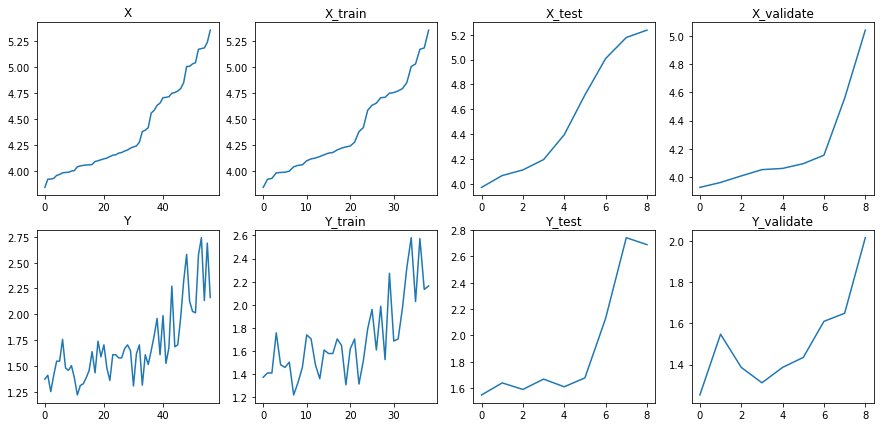

In [172]:
fig, ax = plt.subplots(2, 4, figsize=(15, 7))
ax[0][0].plot(X)
ax[0][0].set_title('X')
ax[0][1].plot(X_train)
ax[0][1].set_title('X_train')
ax[0][2].plot(X_test)
ax[0][2].set_title('X_test')
ax[0][3].plot(X_validate)
ax[0][3].set_title('X_validate')

ax[1][0].plot(Y)
ax[1][0].set_title('Y')
ax[1][1].plot(Y_train)
ax[1][1].set_title('Y_train')
ax[1][2].plot(Y_test)
ax[1][2].set_title('Y_test')
ax[1][3].plot(Y_validate)
ax[1][3].set_title('Y_validate')

In [173]:
# find model by using linear regression:
linear_model = linearRegressionModel(X_train, Y_train)

# find Y by using linear model predict:
Y_train_pred = linear_model.predict(X_train)
Y_test_pred = linear_model.predict(X_test)

# Calculate RMSE on train and test data:
train_linear_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
test_linear_rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))


Linear Regression Model: 


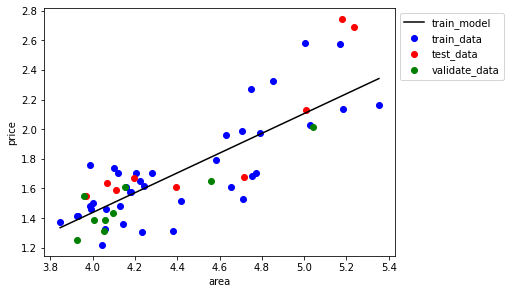

In [174]:
print("\nLinear Regression Model: ")
# Plot linear model:
plt.figure(figsize=(7, 4))
plt.scatter(X_train, Y_train, marker='o', color='blue', label='train_data')
plt.scatter(X_test, Y_test, marker='o', color='red', label='test_data')
plt.scatter(X_validate, Y_validate, marker='o', color='green', label='validate_data')
plt.plot(X_train, Y_train_pred, color='black', label='train_model')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [175]:
# Linear Model coefficient and intercept:
print("Linear model coefficient: {}".format(linear_model.coef_))
print("Linear model intercept: {}".format(linear_model.intercept_))

# linear_model rmse:
print("Linear model rmse on train data: {}".format(train_linear_rmse))
print("Linear model rmse on test data: {}".format(test_linear_rmse))
print("\n\n")

Linear model coefficient: [[0.6681]]
Linear model intercept: [-1.23502829]
Linear model rmse on train data: 0.20210387797959067
Linear model rmse on test data: 0.2519041153548133





In [176]:
# find model by using polynomial regression:
poly_model, degree, validate_rmse = polynomialRegression(X_train, Y_train, X_test, Y_test, X_validate, Y_validate)

# transform X and X_test:
polynomial_features = PolynomialFeatures(degree=degree)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

# Try predicting Y
Y_train_poly_pred = poly_model.predict(X_train_poly)
Y_test_poly_pred = poly_model.predict(X_test_poly)


Selected Polynomial Regression with degree = 4 and RMSE = 0.19346345420206645
Ridge Regression with alpha = 5e-05 and RMSE = 0.22316343560453689
Lasso Model with alpha = 1e-05 and RMSE = 0.2234798582292979
Selected Regularization Model is  Ridge


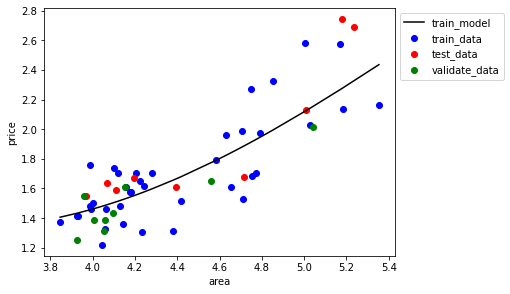

In [177]:
# Plot model:
plt.figure(figsize=(7, 4))
plt.scatter(X_train, Y_train, marker='o', color='blue', label='train_data')
plt.scatter(X_test, Y_test, marker='o', color='red', label='test_data')
plt.scatter(X_validate, Y_validate, marker='o', color='green', label='validate_data')
plt.plot(X_train, Y_train_poly_pred, color='black', label='train_model')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [178]:
print("Polynomial Regression with degree = {}\n".format(degree))
# Polynomial Model coefficient and intercept:
print("Polynomial model coefficient:")
print(poly_model.coef_)
print("Polynomial model intercept: {}\n".format(poly_model.intercept_))

# poly_model rmse:
# print("Polynomial Model RMSE on train data: {}".format(train_rmse))
print("Polynomial Model RMSE on validate data: {}".format(validate_rmse))
# print("Polynomial Model RMSE on test data: {}".format(test_rmse))

Polynomial Regression with degree = 4

Polynomial model coefficient:
[[ 0.         -2.52291188  0.26780039  0.04446306 -0.00526582]]
Polynomial model intercept: [5.77005883]

Polynomial Model RMSE on validate data: Ridge


In [179]:
# score the model with test data:

# Linear score:
print("\n")

linear_train_r2_score = linear_model.score(X_train, Y_train)
print("Linear Model score on train dataset: ", linear_train_r2_score)

linear_test_r2_score = linear_model.score(X_test, Y_test)
print("Linear Model score on test dataset: ", linear_test_r2_score)

# Poly score:
print("\n")

poly_train_r2_score = poly_model.score(X_train_poly, Y_train)
print("Poly Model score on train dataset: ", poly_train_r2_score)

poly_test_r2_score = poly_model.score(X_test_poly, Y_test)
print("Poly Model score on test dataset: ", poly_test_r2_score)



Linear Model score on train dataset:  0.6400489640634175
Linear Model score on test dataset:  0.6919258361264738


Poly Model score on train dataset:  0.6527276974982721
Poly Model score on test dataset:  0.7582141780436897


In [180]:
# calc cross validation score of linear to compare with poly for best model selection
linear_cv = np.mean(cross_val_score(linear_model, X, Y, cv=5))
poly_cv = np.mean(cross_val_score(poly_model, X, Y, cv=5))

best_r2_score = linear_test_r2_score if linear_test_r2_score > poly_test_r2_score else poly_test_r2_score
best_model = linear_model if linear_cv > poly_cv else poly_model
best_degree = 1 if linear_cv > poly_cv else degree

print(linear_cv)
print(poly_cv)

-0.599134362965565
-0.5991050985917786


In [181]:
import unidecode
post_type = unidecode.unidecode(post_type.lower().replace(" ", ""))
street = unidecode.unidecode(street.lower().replace(" ", ""))
ward = unidecode.unidecode(ward.lower().replace(" ", ""))
district = unidecode.unidecode(district.lower().replace(" ", ""))
model_name = post_type + "_" + street + "_" + ward + "_" + district

In [182]:
model_name

'bannharieng_so8_linhxuan_thuduc'

In [183]:
# Save model after training for later use:
from joblib import dump, load

if best_r2_score > 0.7:
    # Save model:
    dump((best_model, best_degree), 'trained\\' + model_name + '.joblib')

In [184]:
try:    
    # load model:
    loaded_model, loaded_degree = load('trained/' + model_name + ".joblib")

    test_area = np.array([92.00])
    test_area = test_area[:, np.newaxis]
    test_area = FunctionTransformer(np.log1p).fit_transform(test_area)

    if loaded_degree == 1:
        predicted_price = loaded_model.predict(test_area)
    else:
        test_area_poly = PolynomialFeatures(degree=loaded_degree).fit_transform(test_area)
        predicted_price = loaded_model.predict(test_area_poly)

    print(FunctionTransformer(np.log1p).inverse_transform(predicted_price))
except FileNotFoundError:
    print("Model not found or trained result is low!")

[[1.75434407]]
